## 한국 음식 분류 모델

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from PIL import Image # 이미지 파일을 연결하고 변환가능한 객체 생성해주는 라이브러리
import os, glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np
# pillow : 이미지 처리 라이브러리
# PIL(Python Imging Library) 후속으로 사용

### 데이터 준비

In [4]:
# 분류 데이터 로딩을 위해 카테고리 지정
# 데이터 저장된 기본 폴더 설정

root_dir = './kfood/'

# 카테고리
categories = ["Chicken", "Dolsotbab", "Jeyugbokkeum", "Kimchi", "Samgyeobsal", "SoybeanPasteStew"]

nb_classes = len(categories)

In [ ]:
# glob 모듈의 glob() 함수
# - 조건에 맞는 파일명을 리스트 형식으로 반환
# '*' 와일드 문자 지원

In [5]:
# 이미지 전처리
X = []
Y = []

# 이미지 크기 지정
image_width = 64
image_height =64

for idx, category in enumerate(categories):
    image_dir = root_dir + category
    files = glob.glob(image_dir + '/' + '*.jpg')
    print(image_dir + '/' + '*.jpg')
    
    # 이미지 전처리
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert('RGB')
        img = img.resize((image_width, image_height))
        data = np.asarray(img) # array로 변환
        X.append(data)
        Y.append(idx)

./kfood/Chicken/*.jpg
./kfood/Dolsotbab/*.jpg
./kfood/Jeyugbokkeum/*.jpg
./kfood/Kimchi/*.jpg
./kfood/Samgyeobsal/*.jpg
./kfood/SoybeanPasteStew/*.jpg


In [7]:
# files

In [11]:
# X

In [10]:
# Y

### 합성곱 신경망 모델 생성

In [25]:
# 이미지 형태를 array로 변환
X = np.array(X)
Y = np.array(Y)

In [26]:
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=100)

In [32]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(109, 64, 64, 3)

(37, 64, 64, 3)

(109, 6)

(37, 6)

In [29]:
# 데이터 변환 (방법1)
from  keras.utils import to_categorical

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 데이터 변환 (방법2)
# 결과는 똑같음
# from tensorflow.python.keras.utils import np_utils

# y_train = np_utils.to_categorical(y_train, nb_classes)
# y_test = np_utils.to_categorical(y_test, nb_classes)

In [22]:
y_test.shape
# 변환 완료

(37, 6, 2)

In [30]:
# (1) 모델 설정

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 25%의 필터를 끔
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# (2) 컴파일
model.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])

In [31]:
# (3) 모델 학습
model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
4/4 [==============================] - 1s 79ms/step - loss: 2.7514 - accuracy: 0.1927
Epoch 2/30
4/4 [==============================] - 1s 135ms/step - loss: 1.7450 - accuracy: 0.1927
Epoch 3/30
4/4 [==============================] - 1s 146ms/step - loss: 1.6138 - accuracy: 0.2385
Epoch 4/30
4/4 [==============================] - 1s 154ms/step - loss: 1.4949 - accuracy: 0.4312
Epoch 5/30
4/4 [==============================] - 1s 148ms/step - loss: 1.6312 - accuracy: 0.3761
Epoch 6/30
4/4 [==============================] - 1s 141ms/step - loss: 1.2431 - accuracy: 0.4587
Epoch 7/30
4/4 [==============================] - 1s 142ms/step - loss: 1.3779 - accuracy: 0.4587
Epoch 8/30
4/4 [==============================] - 1s 137ms/step - loss: 1.3962 - accuracy: 0.4220
Epoch 9/30
4/4 [==============================] - 1s 139ms/step - loss: 0.8120 - accuracy: 0.7248
Epoch 10/30
4/4 [==============================] - 1s 133ms/step - loss: 1.2631 - accuracy: 0.5413
Epoch 11/30
4/4 [===

In [33]:
loss, acc = model.evaluate(X_test, y_test)
loss
acc

2/2 [==============================] - 0s 8ms/step - loss: 2.6800 - accuracy: 0.5135


2.680011749267578

0.5135135054588318

### 테스트 이미지로 예측 결과 확인

In [35]:
test_samples = glob.glob('./image/test/test_*_' + '*.jpg')  # test_김치_1.jpg
test_samples

['./image/test/test_삼겹살_2.jpg',
 './image/test/test_삼겹살_1.jpg',
 './image/test/test_김치_1.jpg',
 './image/test/test_치킨_2.jpg',
 './image/test/test_김치_2.jpg',
 './image/test/test_치킨_1.jpg',
 './image/test/test_김치_3.jpg']

In [36]:
# 테스트 샘플 이미지 전처리
image_size = 64

X = []
test_files = []

# 이미지 전처리
for fname in test_samples:
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((image_size, image_size))
    data = np.asarray(img) # array로 변환
    data = data.astype('float32') / 255
    X.append(data)
    test_files.append(fname)
    
X = np.array(X)

In [38]:
# 예측 실행
pred_prob = model.predict(X)

1/1 [==============================] - 0s 99ms/step


In [39]:
pred_prob

array([[3.21811736e-02, 1.13563808e-02, 1.84631164e-04, 2.97325373e-01,
        2.82573789e-01, 3.76378626e-01],
       [2.02437946e-06, 1.44424503e-05, 3.48500939e-09, 2.84058828e-04,
        1.03777699e-01, 8.95921767e-01],
       [2.54761595e-02, 1.46021764e-03, 2.65707895e-05, 9.60934043e-01,
        5.52657177e-04, 1.15503920e-02],
       [5.20952106e-01, 8.23157097e-05, 3.21391076e-06, 4.78204131e-01,
        2.75381462e-04, 4.82797943e-04],
       [5.76136231e-01, 3.53660180e-05, 6.50872721e-07, 4.23599333e-01,
        1.14440976e-04, 1.13988724e-04],
       [1.50210988e-02, 6.71905873e-04, 5.03366464e-05, 9.80920076e-01,
        1.47114566e-03, 1.86544692e-03],
       [4.28485185e-01, 1.17895011e-04, 2.28582940e-06, 5.70730329e-01,
        4.19118500e-04, 2.45199568e-04]], dtype=float32)

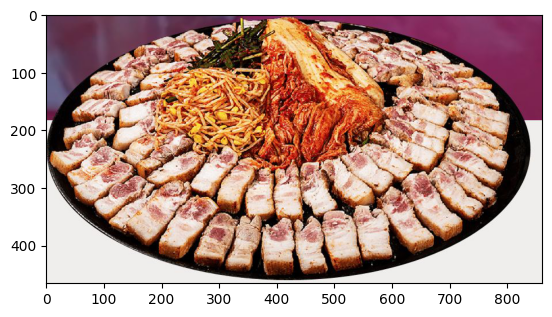

In [50]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

plt.imshow(mpimg.imread(test_samples[0]))
plt.show()

In [52]:
test_samples[0].split('/')

['.', 'image', 'test', 'test_삼겹살_2.jpg']

<Figure size 400x300 with 0 Axes>

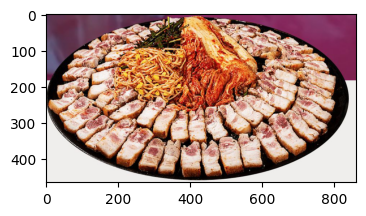

테스트 파일 :  ./image/test/test_삼겹살_2.jpg
실제 :  삼겹살
예측 :  SoybeanPasteStew


<Figure size 400x300 with 0 Axes>

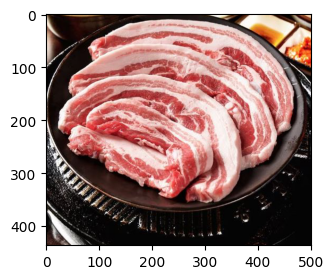

테스트 파일 :  ./image/test/test_삼겹살_1.jpg
실제 :  삼겹살
예측 :  SoybeanPasteStew


<Figure size 400x300 with 0 Axes>

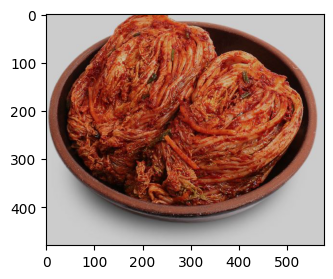

테스트 파일 :  ./image/test/test_김치_1.jpg
실제 :  김치
예측 :  Kimchi


<Figure size 400x300 with 0 Axes>

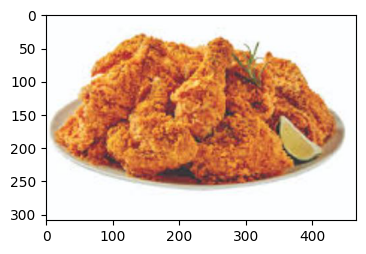

테스트 파일 :  ./image/test/test_치킨_2.jpg
실제 :  치킨
예측 :  Chicken


<Figure size 400x300 with 0 Axes>

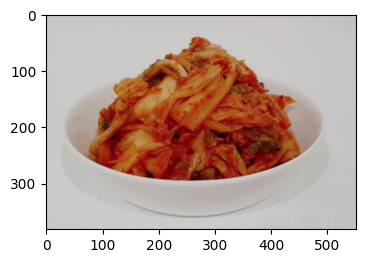

테스트 파일 :  ./image/test/test_김치_2.jpg
실제 :  김치
예측 :  Chicken


<Figure size 400x300 with 0 Axes>

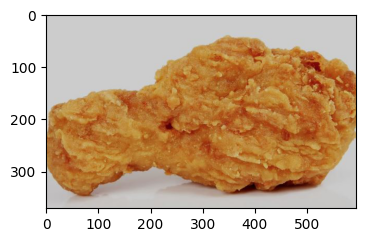

테스트 파일 :  ./image/test/test_치킨_1.jpg
실제 :  치킨
예측 :  Kimchi


<Figure size 400x300 with 0 Axes>

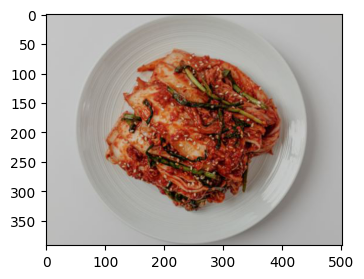

테스트 파일 :  ./image/test/test_김치_3.jpg
실제 :  김치
예측 :  Kimchi


In [53]:
# 예측 결과 출력 
for i, p in enumerate(pred_prob):
    plt.figure(figsize=(4, 3))
    plt.imshow(mpimg.imread(test_samples[i]))
    plt.show()
    
    y = p.argmax() # 예측 확률 가장 큰 값
    print('테스트 파일 : ', test_samples[i])
    print('실제 : ', test_samples[i].split('/')[3].split('_')[1])
    print('예측 : ', categories[y])